In [1]:
import numpy as np
import pandas as pd
import db_lob as lob
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
path = '/home/max/Documents/lob/2505133.csv'

messages = lob.parse_FullMessages(path)

volume = 1000000
ticks = 0.0001

book = lob.LimitOrderBook(volume, ticks)

In [10]:
orders = np.array([])
for msg in tqdm(messages[:int(0.4* len(messages))], desc="Reconstructing the book"):
    maybe_bars = book.generic_incremental_update(msg)
    orders = np.append(orders, book.lastOrder.volume)

        


Reconstructing the book: 100%|██████████| 659568/659568 [03:39<00:00, 3003.82it/s]


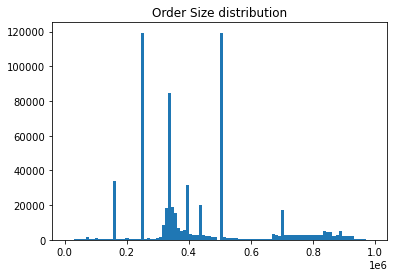

In [11]:
plt.hist(orders[orders < 1e6], bins=100)
#plt.xlim(0, 1e6)
plt.title('Order Size distribution')
plt.show()

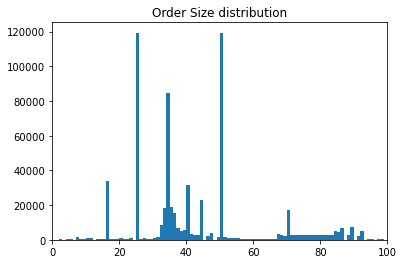

In [12]:
y,x,z = plt.hist(orders[orders < 1e6]/10000, bins=np.arange(100))
plt.xlim(0, 1e2)
plt.title('Order Size distribution')
plt.show()

In [13]:
max_x = x[y.argsort()[::-1][:5]]
max_y = y[y.argsort()[::-1][:5]]

In [14]:
print(max_x, max_y)

[25 50 34 16 40] [119352. 118935.  84445.  33858.  31640.]


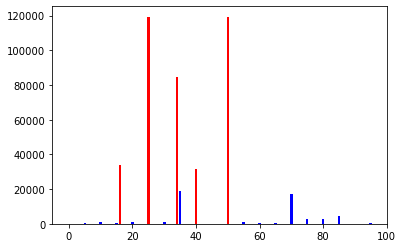

In [15]:
plt.bar(x[0:-1:5], y[0::5], color='b')
plt.bar(max_x, max_y, color='r')
plt.show()